In [ ]:
import pandas as pd

In [ ]:
ts = [
    '2019-01-01', 
    '2019-01-02',
    '2019-01-08', 
    '2019-02-01', 
    '2019-02-02',
    '2019-02-05',
]

# output = [
#     ['2019-01-01', '2019-01-02'], 
#     ['2019-01-08'], 
#     ['2019-02-01', '2019-02-02'],
#     ['2019-02-05'],
# ]
[['2019-01-01', '2019-01-02'],
 ['2019-01-08'],
 ['2019-02-01', '2019-02-02'],
 ['2019-02-05']]

In [ ]:
df = pd.DataFrame({'dates':pd.to_datetime(ts)})
df.set_index('dates', drop=False, inplace=True)
df.resample('W').apply(lambda x: [f for f in x])

In [ ]:
import datetime
#ts is the list given to me
def grouped_items(ts):
    dates = [datetime.datetime.strptime(x, f'%Y-%m-%d') for x in ts]
    week_nums = [((x-dates[0]).days)//7 for x in dates]
    grouped = dict()
    for i in range(len(ts)):
        if week_nums[i] not in grouped:
            grouped[week_nums[i]] = [ts[i]]
        else:
            grouped[week_nums[i]].append(ts[i])
    ans = []
    for i in grouped.keys():
        ans.append(grouped[i])
    return ans

grouped_items(ts)


When using the with method, we can read in the next line and the previous one will be garbage collected unless it gets stored as reference somewhere. That way we can continually count each line in the file without having to worry about total size.

If we're dealing a file in which we can't parse out the newlines with a function infile, then we need to count using a different method of looking at something such as the new line breaks.

In Gibbs sampling, choosing the most recent value vs using all values from the previous iteration. Better convergence whsn using more recent values?

In [ ]:
cnt = 0
with open("byte-by-byte.ipynb") as f:
#     while f.readline():
    for x in f:
        cnt += 1
print(cnt)
del f

In [ ]:
cnt = 0
with open("byte-by-byte.ipynb") as f:
    while f.readline():
#     for x in f:
        cnt += 1
print(cnt)


In [ ]:
del f 

In [ ]:
f = open("byte-by-byte.ipynb", 'r')
cnt = 0
while True:
    x = f.read(1)
    if x:
        cnt += x.count('\n')
    else:
        break
print(cnt)
f.close()

In [ ]:
import numpy as np
a = np.random.rand(10)
sum(a <= 0.5)

In [ ]:
# iid variables, so I can multiply num days
num = 1000000
x = 5 * np.random.rand(num)
y = 5 * np.random.rand(num)
bad_arr = (np.abs(x - y) <= 1) * 1
365 * 1000 * np.sum(bad_arr) / num

In [ ]:
len(bad_arr)

In [ ]:
np.sum(bad_arr)

In [ ]:
730 * 180

In [ ]:
import re
def substring(str1, str2):
    ans = False
    if re.findall(str1+'+', str2):
        ans = True
    return ans
substring('sidu', 'sidufhnre')

#### Check answer to "secret games" question!!!!

HT, HH 1/2
real win
TH
lie and win
TT
say they lost
2/3 = 

In [ ]:
list(set([1,1,35,6,2,4]))

In [ ]:
def combs(integers, tot):
    for x in integers:
        if x < 0 or int(x) != x:
            return []
    integer_set = set(integers)
    mn = min(integer_set)
    if 0 in integer_set:
        integer_set.remove(0)
    def helper(tot):
        ans = []
        if tot < mn:
            return ans
        if tot in integer_set:
            ans.append([tot])
        for x in integer_set:
            tmp = helper(tot-x)
            for s in tmp:
                s1 = s[:]
                s1.append(x)
                ans.append(s1)
        return ans
    return helper(tot)
    

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
df_notbusy = pd.read_csv('../Fall2020LectureNotes/histogram1cyclictestlab4.txt', sep='\s+', header=None)
df_busy = pd.read_csv('../Fall2020LectureNotes/histogram2cyclictest_coressortv1busylab4.txt', sep='\s+', header=None)

In [2]:
def plot_hist(df):
    plt.plot(df[0], df[1])
    plt.plot(df[0], df[2])
    plt.plot(df[0], df[3])
    plt.plot(df[0], df[4])
    plt.xlim([0,80])
    plt.legend(['Thread 1','Thread 2','Thread 3','Thread 4'])
    plt.xlabel('Time (nanoseconds)')
    plt.ylabel('Histogram counts')
    plt.title('Cyclictest with 4 threads: 300000 loops')

In [3]:
min({1,2,35})

1

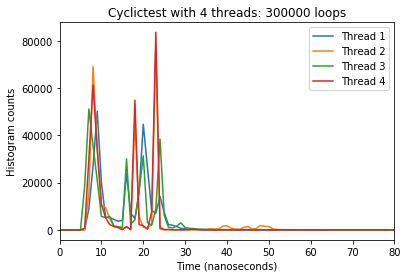

In [4]:
plot_hist(df_busy)

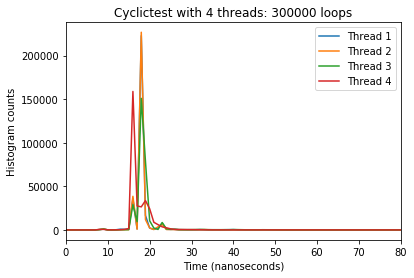

In [5]:
plot_hist(df_notbusy)

In [ ]:
print([df_busy[i].sum() for i in range(1,5)])

In [7]:
import numpy as np

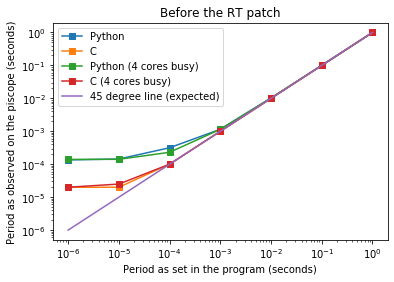

In [8]:
period_py = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
piscope_py = [1, 0.1002, 0.01018, 0.001152, 0.000316, 0.000144, 0.000135]
period_c = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
piscope_c = [1, 0.1, 0.0099980, 0.001, 0.000101, 0.000020, 0.000020]
period_c_busy = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
piscope_c_busy = [1, 0.1, 0.009950, 0.001, 0.0001, 0.000025, 0.000020]
period_py_busy = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
piscope_py_busy = [1, 0.1, 0.0103, 0.001145, 0.000230, 0.000141, 0.000140]
plt.loglog(period_py, piscope_py, marker='s')
plt.loglog(period_c, piscope_c, marker='s')
plt.loglog(period_py_busy, piscope_py_busy, marker='s')
plt.loglog(period_c_busy, piscope_c_busy, marker='s')
plt.loglog(np.logspace(-6, 0, 1000), np.logspace(-6, 0, 1000))
plt.xlabel('Period as set in the program (seconds)')
plt.ylabel('Period as observed on the piscope (seconds)')
plt.title('Before the RT patch')
plt.legend(['Python', 'C', 'Python (4 cores busy)', 'C (4 cores busy)', '45 degree line (expected)'])
# saw that 0.000316 things went wrong unequal length squares: just 1 obsv, not sure so don't report
# std=c99 causes warnings in clock_nanosleep()!

In [ ]:
#test_v16
#unloaded core break down at 1000 interval input to the C code
#5 / 730
5/730
1460 

In [ ]:
def combinations(n,m):
    #faces 1 to m
    #n dice, list of n elements
    if n == 0:
        return []
    if n == 1:
        return [[x] for x in range(1,m+1)]
    else:
        ans = []
        prev = combinations(n-1,m)
        for s in prev:
            for i in range(1, m+1):
                tmp = s[:]
                tmp.append(i)
                ans.append(tmp)
        return ans

len(combinations(3,5))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
def random_from_stream(stream):
    if not stream:
        return []
    if len(stream) == 1:
        return stream[0]
    ans = stream[0]
    p = 0.5
    for i in range(1, len(stream)):
        c = np.random.rand(1)
        if c < p:
            ans = stream[i]
        p = p/(1+p)
    return ans

arr = [0,1,2,3,4]
rands = []
for i in range(100000):
    rands.append(random_from_stream(arr))
plt.hist(rands, bins=[0,1,2,3,4,5], histtype='bar')
    

In [ ]:
class Stream:
    def __init__(self, init_el):
        self.rand = init_el
        self.prob = 0.5
    def append(self, x):
        self.rand_calc(x)
        self.prob = self.prob/(1+self.prob)
    def rand_calc(self, x):
        tmp = np.random.rand(1)
        if tmp < self.prob:
            self.rand = x
    def random_element(self):
        return self.rand


In [ ]:
rands = []
for i in range(100000):
    s = Stream(1)
    s.append(2)
    s.append(3)
    rands.append(s.random_element())
Counter(rands)

In [ ]:
import re
def is_rotation(s1, s2):
    #s2 is a rotation of s1?
    if len(s1) != len(s2):
        return False
    if re.findall(s1, s2+s2):
        return True
    else:
        return False
is_rotation('cdeab', 'abcde')

In [ ]:
import re
def is_rotation2(s1, s2):
    #s2 is a rotation of s1?
    if len(s1) != len(s2):
        return False
    s2d = s2 + s2
    n = len(s2d)
    j = 0
    for i in range(n):
        if j == len(s1):
            return True
        if s1[j] == s2d[i]:
            j += 1
        else:
            j = 0
    return False
is_rotation2('cdeab', 'abecde'), is_rotation('cdeab', 'abecde')

In [ ]:
def miss(arr):
    n = len(arr)
    return int(n * (n+1) / 2 - sum(arr))
miss([4,1,2,3])

In [ ]:
from math import floor, ceil
def interp(x1,y1,x2,y2,x):
    if x1 == x2:
        return y1
    else:
        return (y2-y1) * (x-x1) / (x2-x1) + y1

def IQR(a):
    n = len(a)
    arr = sorted(a)
    q1 = interp(floor((n - 1)/4), arr[floor((n - 1)/4)], ceil((n - 1)/4), arr[ceil((n - 1)/4)], (n-1)/4)
    q3 = interp(floor(3*(n - 1)/4), arr[floor(3*(n - 1)/4)], ceil(3*(n - 1)/4), arr[ceil(3*(n - 1)/4)], 3*(n-1)/4)
    return q3-q1

In [ ]:
IQR([7,1,2,3,4,5,6])

In [ ]:
from scipy.stats import iqr
for i in range(10000):
    a = np.random.randint(0,10,np.random.randint(1,20,1))
    assert iqr(a) == IQR(a)

In [ ]:
def isMap(a1,a2):
    n = len(a1)
    if len(a2) != n:
        return False
    map_dict = dict()
    for i in range(n):
        if a1[i] in map_dict:
            if map_dict[a1[i]] != a2[i]:
                return False
        else:
            map_dict[a1[i]] = a2[i]
    return True
isMap('ase', 'qbq')

In [ ]:
def split_ind(nums):
    s = sum(nums)
    tmp = 0
    for i in range(1, len(nums)):
        tmp += nums[i-1]
        if tmp == (s-nums[i])/2:
            return i
    return -1
split_ind([1,7,3,5,5,6])
split_ind([1,3,5])

In [ ]:
import pandas as pd
df = pd.DataFrame({'user_id':[1,2,3,4,5],
                   'grade':[10,10,11,10,11],
                   'test score':[85,60,90,30,99]
                  }, index=[0,1,2,3,4])

In [ ]:
df.iloc[5] = [5,11,20]

In [ ]:
lt50 = pd.DataFrame(df.groupby('grade')['test score'].apply(lambda x: 100*sum([y <= 50 for y in x])/len(x)))
lt50['score'] = '<50'
lt75 = pd.DataFrame(df.groupby('grade')['test score'].apply(lambda x: 100*sum([y <= 75 for y in x])/len(x)))
lt75['score'] = '<75'
lt90 = pd.DataFrame(df.groupby('grade')['test score'].apply(lambda x: 100*sum([y <= 90 for y in x])/len(x)))
lt90['score'] = '<90'
lt100 = pd.DataFrame(df.groupby('grade')['test score'].apply(lambda x: 100*sum([y <= 100 for y in x])/len(x)))
lt100['score'] = '<100'

In [ ]:
dfo = pd.concat([lt50, lt75, lt90, lt100], axis=0)

In [ ]:
dfo

In [ ]:
pd.pivot_table(df,index='grade', columns='user_id', values='test score')

In [ ]:
def stem(sentence, roots):
    words = sentence.split(' ')
    roots_set = set(roots)
    final = []
    for w in words:
        i = 0
        while i  < len(w):
            i += 1
            if w[:i] in roots_set:
                final.append(w[:i])
                break #break from the for loop
        if i == len(w):
            final.append(w)
    return ' '.join(final)
stem('the cattle was rattled by the battery', ['cat', 'bat', 'rattle'])

In [ ]:
'Thwe dY xa;osxk Yuaclkm'.lower()

In [ ]:
from collections import Counter
def topN(posting, N):
    count_dict = Counter([x.strip().lower() for x in posting.split(' ')])
    tups = [(i,count_dict[i]) for i in count_dict]
    out = sorted(tups, key=lambda x: -x[1])
    return out[:min(N, len(out))]
topN('''
Herbal sauna uses the healing properties of herbs in combination with distilled water. 
The water evaporates and distributes the effect of the herbs throughout the room. 
A visit to the herbal sauna can cause real miracles, especially for colds. 
''', 3)

In [ ]:
def remove_stopwords(text, stopwords):
    text_lower = [x.lower().strip() for x in text.split(' ')]
    stopwords_set = set([x.lower() for x in stopwords])
    ans = []
    for x in text_lower:
        if x not in stopwords_set:
            ans.append(x)
    return ' '.join(ans)

In [ ]:
text = 'Casiuehfcn, I want to go home and sleep.'
remove_stopwords(text, ['I', 'and'])

In [ ]:
text

In [ ]:
def max_tipper(user_ids, tips):
    if len(user_ids) != len(tips) or len(tips) == 0:
        return -1
    mx = 0
    for i in range(len(tips)):
        if tips[mx] < tips[i]:
            mx = i
    return user_ids[mx]

In [ ]:
import math
def primes(N):
    ans = []
    for i in range(2, N+1):
        compflag = 0
        for j in range(2, 1+math.ceil(math.sqrt(i))):
            if i > j and i % j == 0:
                compflag = 1
                break
        if compflag == 0:
            ans.append(i)
    return ans

print(len(primes(1000)))

In [ ]:
import math
def calculate_rmse(a, b):
    if len(a) != len(b) or len(a) == 0:
        return None
    return math.sqrt(sum([(a[i]-b[i])**2 for i in range(len(a))])/len(a))

print(calculate_rmse([3,4,5], [3,4,5]), calculate_rmse([3,4,5], [5,4,3]))

In [ ]:
def normalize_grades(tuples):
    if len(tuples) == 1:
        return []
    ans = []
    mn = min([x[1] for x in tuples])
    mx = max([x[1] for x in tuples])
    if mx == mn:
        return [(x[0], 1) for x in tuples]
    for x in tuples:
        ans.append((x[0], round((x[1]-mn)/(mx-mn),2)))
    return ans
normalize_grades([('Jason', 94),
    ('Tessa', 80),
    ('Carla', 38),
    ('Matt', 43),
    ('Jessica', 100)])

In [ ]:
{1:2}.values()

In [ ]:
import numpy as np
from collections import Counter
def random_simulate(freqs):
    dict_keys = list(freqs.keys())
    dict_values = np.array([0] + list(freqs.values()))
    if np.sum(dict_values) <= 0:
        return None
    lims = np.cumsum(dict_values)/np.sum(dict_values)
    p = np.random.rand(1)
    for k in range(len(dict_keys)):
        if p >= lims[k]  and p < lims[k+1]:
            return dict_keys[k]
    return dict_keys[-1]
print(Counter([random_simulate({'A': 1, 'B': 2, 'C':3, 'D':4}) for i in range(100000)]))

In [ ]:
chi1 = (411-400) ** 2 / 400 + (302-300) ** 2 / 300 + (200-193) ** 2 / 200 + (100-94) ** 2 / 100
chi0 = (41-40) ** 2 / 40 + (29-30) ** 2 / 30 + (19-20) ** 2 / 20 + (11-10) ** 2 / 10
chi2 = (40027-40000) ** 2 / 40000 + (29855-30000) ** 2 / 30000 + (20073-20000) ** 2 / 20000 + (10045-10000) ** 2 / 10000
print(chi0, chi1, chi2)

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib .pyplot as plt
def truncated_normal(n, percentile, mu, sigma):
    lim = norm.ppf(percentile + (1-percentile)/2)
    x = np.random.randn(int(2*n/percentile))
    x = x[abs(x) < lim]
    return x[:n] * sigma + mu
x = plt.hist(truncated_normal(100000, 0.995, 0, 1), bins=100)

In [ ]:
def min_change(n, coins): #assuming all non-neg amounts can be represented
    arr = [0] * (n+1) #number of coins needed
    for i in range(1, n+1):
        cands = []
        for c in coins:
            if i >= c:
                cands.append(1+arr[i-c])
        arr[i] = min(cands)
    return arr[n]
min_change(73,[1,5,10,25])

In [ ]:
import pandas as pd
ser = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))

In [ ]:
ser.name= 'pore'
ser.head()

In [ ]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser1.name = 'a'
ser2 = pd.Series([4, 5, 6, 7, 8])
ser2.name = 'b'
pd.concat([ser1[~ser1.isin(ser2)], ser2[~ser2.isin(ser1)]])

In [ ]:
import numpy as np
ser = pd.Series(np.random.normal(10, 5, 25))
np.percentile(ser, q=[0,25,75])

In [ ]:
from collections import Counter
ser = pd.Series(np.take(list('abcdefgh'), np.random.randint(8, size=30)))
Counter(ser.values)

In [ ]:
ser = pd.Series(np.random.randint(1, 5, [12]))
top2 = list(ser.value_counts().index[:2])
ser1 = ser.loc[:]
ser[~ser.isin(top2)] = 'Other'
print(ser)
print(ser1)

In [ ]:
ser1.value_counts()

In [ ]:
ser = pd.Series(np.random.random(20))

In [ ]:
ser = pd.Series(np.random.randint(1, 10, 35))
pd.DataFrame(np.reshape(ser.values,(7,5)))

In [ ]:
ser = pd.Series(np.random.randint(1, 10, 7))
ser[ser % 3 == 0].index, ser.head()

In [ ]:
ser = pd.Series(list('abcdefghijklmnopqrstuvwxyz'))
pos = [0, 4, 8, 14, 20]
ser.loc[pos]

In [ ]:
ser1 = pd.Series(range(5))
ser2 = pd.Series(list('abcde'))
pd.concat([ser1, ser2], axis=1)

In [ ]:
ser1 = pd.Series([10, 9, 6, 5, 3, 1, 12, 8, 13])
ser2 = pd.Series([1, 3, 10, 13])
list(ser1[ser1.isin(ser2)].index)

In [ ]:
truth = pd.Series(range(10))
pred = pd.Series(range(10)) + np.random.random(10)
((truth - pred) ** 2).mean()

In [ ]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])
ser.apply(lambda x: x.capitalize())

In [ ]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])
ser.apply(lambda x: len(x))

In [ ]:
ser = pd.Series([1, 3, 6, 10, 15, 21, 27, 35])
diff = ser.values[1:] - ser.values[:-1]
diff_diff = diff[1:] - diff[:-1]
diff_diff

In [ ]:
diff

In [ ]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])
pd.to_datetime(ser)

In [ ]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])
weekday_name = ['Sun', 'Mon', 'Tue', 'W', 'R', 'F', 'S']
pd.DataFrame({'actual':ser, 'week':pd.to_datetime(ser).dt.week, 'day':pd.to_datetime(ser).dt.weekday.apply(lambda x: weekday_name[x]), 'year':pd.to_datetime(ser).dt.year})

In [ ]:
from datetime import datetime
ser = pd.Series(['Jan 2010', 'Feb 2011', 'Mar 2012'])
pd.to_datetime(ser.apply(lambda x: '04 '+x))

In [ ]:
from collections import Counter
def count_vowels(s):
    c = Counter(list(s))
    cnt = 0
    for v in ['a', 'e', 'i', 'o', 'u']:
        if v in c:
            cnt += 1
    return cnt
ser = pd.Series(['Apple', 'Orange', 'Plan', 'Python', 'Money'])
ser[ser.apply(lambda x: count_vowels(x))>=2]

In [ ]:
import re
emails = pd.Series(['buying books at amazom.com', 'rameses@egypt.com', 'matt@t.co', 'narendra@modi.com'])
re.findall('[A-Za-z0-9]+@[A-Za-z0-9]+\\.[a-z]{2,4}', 'i love you papa@amazom.com')

In [ ]:
if re.findall('[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\\.[A-Za-z]{2,4}', 'papa@amazom.com'):
    print(True)

In [ ]:
!pip3 install SpeechRecognition

In [ ]:
!pip3 install pyaudio

In [ ]:
import pyaudio

p = pyaudio.PyAudio()
info = p.get_host_api_info_by_index(0)
numdevices = info.get('deviceCount')

for i in range(0, numdevices):
    if (p.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
        print ("Input Device id ", i, " - ", p.get_device_info_by_host_api_device_index(0, i).get('name'))

In [ ]:
import speech_recognition as sr

r = sr.Recognizer()
speech = sr.Microphone(device_index=1)
with speech as source:
    print("say something!…")
    audio = r.adjust_for_ambient_noise(source)
    audio = r.listen(source)
try:
    recog = r.recognize_google(audio, language = 'gu-IN') #en-US

    print("You said: " + recog)
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand audio")
except sr.RequestError as e:
    print("Could not request results from Google Speech Recognition service; {0}".format(e))

In [ ]:
import speech_recognition as sr
import pyttsx3

engine = pyttsx3.init()
engine.setProperty('rate', 200)
engine.setProperty('volume', 0.9)
r = sr.Recognizer()
speech = sr.Microphone(device_index=1)
with speech as source:
    audio = r.adjust_for_ambient_noise(source)
    audio = r.listen(source)
try:
    recog = r.recognize_google(audio, language = 'en-US')
    print("You said: " + recog)
    engine.say("You said: " + recog)
    engine.runAndWait()
except sr.UnknownValueError:
    engine.say("Google Speech Recognition could not understand audio")
    engine.runAndWait()
except sr.RequestError as e:
    engine.say("Could not request results from Google Speech Recognition service; {0}".format(e))
    engine.runAndWait()

In [ ]:
!pip3 install pypiwin32 pyttsx3

In [ ]:
fruit = pd.Series(np.random.choice(['apple', 'banana', 'carrot'], 10))
weights = pd.Series(np.linspace(1, 10, 10))
pd.DataFrame({'w':weights,'f':fruit}).groupby('f').mean()

In [ ]:
p = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
q = pd.Series([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])
np.sqrt(((p-q)**2).sum())

In [ ]:
friends_added = [{'user_ids': [1, 2], 'created_at': '2020-01-01'},
                 {'user_ids': [3, 2], 'created_at': '2020-01-02'},
                 {'user_ids': [2, 1], 'created_at': '2020-02-02'},
                 {'user_ids': [4, 1], 'created_at': '2020-02-02'}]

friends_removed = [{'user_ids': [2, 1], 'created_at': '2020-01-03'},
                   {'user_ids': [2, 3], 'created_at': '2020-01-05'},
                   {'user_ids': [1, 2], 'created_at': '2020-02-05'}]
def friend_dict(added, removed):
    friendships = []
    done = [0] * len(removed)
    for a in added:
        users = sorted(a['user_ids'])
        for i in range(len(removed)):
            if users == sorted(removed[i]['user_ids']) and done[i] == 0:
                friendships.append({
                    'user_ids':users,
                    'start_date': a['created_at'],
                    'end_date':removed[i]['created_at']
                })
                done[i] = 1
                break
    return friendships
friend_dict(friends_added, friends_removed)

In [ ]:
friendships = [{
    'user_ids': [1, 2],
    'start_date': '2020-01-01',
    'end_date': '2020-01-03'
  },
  {
    'user_ids': [1, 2],
    'start_date': '2020-02-02',
    'end_date': '2020-02-05'
  },
  {
    'user_ids': [2, 3],
    'start_date': '2020-01-02',
    'end_date': '2020-01-05'
  },
]
print(sorted(friendships, key=lambda x: x['user_ids'][0]))

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ser = pd.Series([2, 10, 3, 4, 9, 10, 2, 7, 3])
np.where(np.sign(ser.diff()).diff() == -2)[0] - 1

In [ ]:
from collections import Counter
import re
def repl(string):
    d = sorted(list(Counter(list(string)).items()), key=lambda x: x[1])
    mn = None
    for x in d:
        if x[0] != ' ':
            mn = x[0]
            break
    return re.sub(r'\s', mn, string)
repl('sdasf elkgjl kerjfvn c')

In [ ]:
Counter('sdasf elkgjl kerjfvn c')

In [ ]:
import datetime
import pandas as pd
pd.Series(np.random.randint(1,6,11), index = [pd.to_datetime('01/01/2000') + datetime.timedelta(days=7*i) for i in range(11)])

In [ ]:
ser = pd.Series([1,10,3, np.nan], index=pd.to_datetime(['2000-01-01', '2000-01-03', '2000-01-06', '2000-01-08']))
ser.resample('D').ffill()

In [ ]:
ser.resample('D').ffill().autocorr(i) for i in range()

In [ ]:
ser = pd.Series(np.sin(np.pi * np.arange(20)/10) + 0.0 * np.random.normal(1, 10, 20))
[ser.autocorr(i) for i in range(1, 11)]

In [ ]:
ser

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv', chunksize=50,
                 converters={'medv':lambda x: 'High' if float(x) > 25 else 'Low'}, 
                 columns=['medv'])

df2 = pd.DataFrame()
for chunk in df:
    df2 = df2.append(chunk.iloc[0,:])

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
df.describe()

In [ ]:
type(df.values)

In [ ]:
df.values[:5,:5]

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
df.loc[df['Price']==max(df['Price'])]

In [ ]:
df.rename(columns={'Type':'type'}, inplace=True)

In [ ]:
df.head().isnull().values.all()

In [ ]:
[(col, df[col].isnull().sum()) for col in df.columns]

In [ ]:
col = 'Price'
df[col].fillna(df[col].mean()).loc[df[col].fillna(df[col].mean()).isnull()]

In [ ]:
df[col].loc[df[col].isnull()]

In [ ]:
df['Price'].round(0)

In [ ]:
df = pd.DataFrame(np.random.random(4), columns=['random'])
df['random'] *= 100

In [ ]:
df

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
df.iloc[::3]

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv', usecols=[0,1,2,3,5])
df.loc[df['Manufacturer'].isnull(), 'Maunfacturer'] = 'missing'
df.loc[df['Model'].isnull(), 'Maunfacturer'] = 'missing'
df.loc[df['Type'].isnull(), 'Maunfacturer'] = 'missing'
df.index = df[['Manufacturer', 'Model', 'Type']]

In [ ]:
df

In [ ]:
import numpy as np
import pandas as pd

In [15]:
df = pd.DataFrame(np.random.randint(1, 30, 30).reshape(10,-1), columns=list('abc'))
print(sorted(df['a']))
df.iloc[df['a'].argsort().iloc[-5]].a

[1, 2, 6, 11, 13, 14, 15, 16, 17, 27]


14

[4, 6, 11, 14, 14, 18, 20, 22, 24, 27]

In [20]:
ser = pd.Series(np.random.randint(1, 100, 15))
print(ser)
ser.loc[ser>ser.mean()].sort_values().iloc[-2]

0     68
1     70
2     92
3     90
4     44
5     63
6     62
7     32
8     92
9     24
10    67
11    85
12    90
13    51
14    56
dtype: int32


92

In [21]:
print(ser[ser>ser.mean()].sort_values())

10    67
0     68
1     70
11    85
3     90
12    90
2     92
8     92
dtype: int32


In [27]:
df = pd.DataFrame(np.random.randint(10, 40, 60).reshape(-1, 4))
df.loc[df.sum(axis=1) > 100, :].sum(axis=1)

1     107
2     101
3     142
6     113
11    125
13    107
dtype: int64

In [28]:
df.sum(axis=1)

0      64
1     107
2     101
3     142
4      86
5      79
6     113
7     100
8      83
9      81
10     98
11    125
12     89
13    107
14    100
dtype: int64

In [31]:
np.percentile(q=[25,50,75])

AttributeError: 'DataFrame' object has no attribute 'percentile'

In [43]:
ser = pd.Series(np.logspace(-2, 2, 30))
print(ser)
ser[ser <= np.percentile(ser, q=5)], ser[ser >= np.percentile(ser, q=95)] = np.percentile(ser, q=5), np.percentile(ser, q=95)

0       0.010000
1       0.013738
2       0.018874
3       0.025929
4       0.035622
5       0.048939
6       0.067234
7       0.092367
8       0.126896
9       0.174333
10      0.239503
11      0.329034
12      0.452035
13      0.621017
14      0.853168
15      1.172102
16      1.610262
17      2.212216
18      3.039195
19      4.175319
20      5.736153
21      7.880463
22     10.826367
23     14.873521
24     20.433597
25     28.072162
26     38.566204
27     52.983169
28     72.789538
29    100.000000
dtype: float64


In [44]:
ser


0      0.016049
1      0.016049
2      0.018874
3      0.025929
4      0.035622
5      0.048939
6      0.067234
7      0.092367
8      0.126896
9      0.174333
10     0.239503
11     0.329034
12     0.452035
13     0.621017
14     0.853168
15     1.172102
16     1.610262
17     2.212216
18     3.039195
19     4.175319
20     5.736153
21     7.880463
22    10.826367
23    14.873521
24    20.433597
25    28.072162
26    38.566204
27    52.983169
28    63.876672
29    63.876672
dtype: float64

In [61]:
df = pd.DataFrame(np.random.randint(-20, 50, 100).reshape(10,-1))
dfp = df.values[df.values >= 0]
tot = dfp.shape[0]
sq = int(np.floor(np.sqrt(tot)))
kick = int(tot - sq*sq)
print(kick, tot)
print(dfp[np.sort(np.argsort(dfp)[kick:])].reshape((sq,-1)))
print(df.values)


4 68
[[22 36 46 45  4 26 13 39]
 [13 37 10 28 40  2 44 10]
 [41 28 31 34  8 44 49 44]
 [ 9 27 42 24 13 45 24 29]
 [30 39 45 34 32  7 25 40]
 [47 42 25  9 23  1 33 30]
 [42  1 18  2 15 19 20 41]
 [21 23 45 22 15 40 37 46]]
[[ 22  -6  36 -14  46  45 -18 -12   4  26]
 [ 13  39  13  37  10 -11  28 -15  40   2]
 [ 44  -4  -5  10 -10 -11   0  41  28  31]
 [  0  34 -15   8  -8  44 -12  -4  49  -6]
 [ 44  -4   9  27  42  24  13  45  24  29]
 [ 30   0  39 -14  45 -12  34  32   7  25]
 [-12   0  40  47  42  25   9  23 -12   1]
 [ 33  -6 -20  30  42   1 -19  -1  -1  18]
 [  2 -12  15  19  20  41  -8 -19  21  -9]
 [-11  23 -13  45  22  15 -16  40  37  46]]


In [56]:
np.floor(2.5)

2.0

In [67]:
df = pd.DataFrame(np.arange(25).reshape(5, -1))
print(df)
tmp = df.iloc[2,:].copy()
df.iloc[2,:] = df.iloc[3,:].copy()
df.iloc[3,:] = tmp
print(df)

    0   1   2   3   4
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19
4  20  21  22  23  24
    0   1   2   3   4
0   0   1   2   3   4
1   5   6   7   8   9
2  15  16  17  18  19
3  10  11  12  13  14
4  20  21  22  23  24


In [70]:
df = pd.DataFrame(np.arange(25).reshape(5, -1))
df.reset_index(inplace=True, drop=True)
df.iloc[(df.shape[0]-1)::-1], df

(    0   1   2   3   4
 4  20  21  22  23  24
 3  15  16  17  18  19
 2  10  11  12  13  14
 1   5   6   7   8   9
 0   0   1   2   3   4,
     0   1   2   3   4
 0   0   1   2   3   4
 1   5   6   7   8   9
 2  10  11  12  13  14
 3  15  16  17  18  19
 4  20  21  22  23  24)

In [76]:
df = pd.DataFrame(np.arange(25).reshape(5,-1), columns=list('abcde'))
pd.get_dummies(df, columns=['a'])

,b,c,d,e,a_0,a_5,a_10,a_15,a_20
0,1,2,3,4,1,0,0,0,0
1,6,7,8,9,0,1,0,0,0
2,11,12,13,14,0,0,1,0,0
3,16,17,18,19,0,0,0,1,0
4,21,22,23,24,0,0,0,0,1


In [81]:
from collections import Counter

df = pd.DataFrame(np.random.randint(1,100, 40).reshape(10, -1))
yo = []
for i in range(df.shape[0]):
    yo.append(np.argmax(df.iloc[i,:]))
print(Counter(yo))
sorted(Counter(yo).items(), key=lambda x: x[1])[-1][0]
    

Counter({2: 4, 0: 4, 3: 1, 1: 1})


0

In [83]:
df.groupby(0).agg(['mean', 'median'])

1            2           3       
   mean median  mean median mean median
0                                      
18    2      2  78.0   78.0   67     67
21   85     85   3.0    3.0   59     59
41   10     10  58.0   58.0   15     15
42   57     57  44.5   44.5   56     56
63   85     85  99.0   99.0   46     46
64   31     31  52.0   52.0    1      1
82   42     42  64.0   64.0   32     32
86   58     58  62.0   62.0   84     84
99   10     10  69.0   69.0   49     49

In [84]:
df

,0,1,2,3
0,42,71,85,56
1,82,42,64,32
2,42,43,4,56
3,21,85,3,59
4,63,85,99,46
5,18,2,78,67
6,41,10,58,15
7,64,31,52,1
8,86,58,62,84
9,99,10,69,49


In [88]:
df = pd.DataFrame(np.random.randint(1,100, 40).reshape(10, -1), columns=list('pqrs'), index=list('abcdefghij'))
tmp = df.apply(lambda x: np.sum((x - df.loc['a',:]) ** 2), axis = 1)
tmp[tmp > 0]

a        0
b     9540
c     7546
d    12943
e    14854
f     6348
g     4060
h     8611
i     5115
j     2215
dtype: int64

In [94]:
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1), columns=list('pqrstuvwxy'), index=list('abcdefgh'))

corrs = []
df_corr = df.corr()
for i in range(df.shape[1]):
    for j in range(i):
        corrs.append((df_corr.index[i], df_corr.index[j], df_corr.iloc[i,j]))
max(corrs, key=lambda x:abs(x[2]))

('s', 'r', 0.7993349579905448)

In [102]:
df_corr[df_corr > 0.799]

,p,q,r,s,t,u,v,w,x,y
p,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r,NaN,NaN,1.000000,0.799335,NaN,NaN,NaN,NaN,NaN,NaN
s,NaN,NaN,0.799335,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
t,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
u,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
v,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [103]:
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1))
df.apply(lambda x: np.min(x)/np.max(x), axis=1)

0    0.051546
1    0.052632
2    0.050505
3    0.102273
4    0.072165
5    0.137931
6    0.094595
7    0.053191
dtype: float64

In [104]:
df

,0,1,2,3,4,5,6,7,8,9
0,87,53,84,13,71,16,97,67,5,65
1,95,24,93,95,33,32,5,58,7,13
2,94,59,99,79,98,96,5,43,89,83
3,33,53,9,19,12,35,30,19,88,77
4,7,78,58,97,60,12,42,54,37,22
5,28,87,12,41,61,29,16,35,65,73
6,36,53,20,44,31,53,19,74,7,70
7,93,41,25,94,21,57,5,91,22,72


In [105]:
5/97, 5/95, 5/99, 9/88, 7/97

(0.05154639175257732,
 0.05263157894736842,
 0.050505050505050504,
 0.10227272727272728,
 0.07216494845360824)

In [108]:
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1))
df['penultimate'] = df.apply(lambda x: np.sort(x)[-2], axis=1)

In [109]:
df

,0,1,2,3,4,5,6,7,8,9,penultimate
0,98,82,72,17,66,49,89,80,96,15,96
1,64,21,54,54,18,15,76,71,57,25,71
2,9,87,9,42,73,96,16,26,12,1,87
3,96,23,48,82,76,16,98,41,31,66,96
4,67,20,5,65,60,85,68,64,42,10,68
5,67,62,64,24,30,88,38,31,3,74,74
6,44,77,55,20,81,68,21,69,16,15,77
7,51,44,3,79,40,50,31,54,74,29,74


In [117]:
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1))
(df - df.min()) / (df.max() - df.min())

,0,1,2,3,4,5,6,7,8,9
0,0.4875,1.000000,0.569231,0.935484,0.627451,0.752688,0.000000,0.869048,0.076923,0.644737
1,0.9250,0.673913,0.600000,0.241935,0.235294,0.612903,0.236111,0.476190,1.000000,1.000000
2,0.9125,0.336957,0.000000,1.000000,0.901961,1.000000,1.000000,0.000000,0.884615,0.000000
3,1.0000,0.532609,0.184615,0.790323,0.000000,0.000000,0.152778,0.380952,0.602564,0.644737
4,0.0250,0.228261,0.738462,0.258065,0.921569,0.408602,0.736111,0.190476,0.320513,0.263158
5,0.2000,0.967391,1.000000,0.645161,0.196078,0.688172,0.291667,0.785714,0.000000,0.328947
6,0.6500,0.608696,0.184615,0.838710,0.745098,0.408602,0.388889,1.000000,0.256410,0.723684
7,0.0000,0.000000,0.984615,0.000000,1.000000,0.559140,0.319444,0.571429,0.679487,0.276316


In [118]:
df

,0,1,2,3,4,5,6,7,8,9
0,54,93,39,86,78,74,2,87,13,53
1,89,63,41,43,58,61,19,54,85,80
2,88,32,2,90,92,97,74,14,76,4
3,95,50,14,77,46,4,13,46,54,53
4,17,22,50,44,93,42,55,30,32,24
5,31,90,67,68,56,68,23,80,7,29
6,67,57,14,80,84,42,30,98,27,59
7,15,1,66,28,97,56,25,62,60,25


In [119]:
df.iloc[0,0] = np.nan

In [123]:
df.fillna(int(54), inplace=True)

In [125]:
df[0] = df[0].astype('int')

In [128]:
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1))
dftcorr = df.transpose().corr()
pd.Series([dftcorr.iloc[i, i+1] for i in range(df.shape[0]-1)], index=[(i,i+1) for i in range(df.shape[0]-1)])

(0, 1)    0.490598
(1, 2)   -0.480785
(2, 3)    0.153309
(3, 4)   -0.102945
(4, 5)   -0.154263
(5, 6)    0.658240
(6, 7)    0.036029
dtype: float64

In [129]:
dftcorr

,0,1,2,3,4,5,6,7
0,1.000000,0.490598,-0.522122,0.055536,0.780896,0.112120,0.103236,0.118816
1,0.490598,1.000000,-0.480785,0.546206,0.076939,0.291375,0.414099,0.431331
2,-0.522122,-0.480785,1.000000,0.153309,-0.201117,0.097563,0.065832,-0.122272
3,0.055536,0.546206,0.153309,1.000000,-0.102945,0.219204,0.288585,0.094418
4,0.780896,0.076939,-0.201117,-0.102945,1.000000,-0.154263,-0.276447,0.168246
5,0.112120,0.291375,0.097563,0.219204,-0.154263,1.000000,0.658240,0.066803
6,0.103236,0.414099,0.065832,0.288585,-0.276447,0.658240,1.000000,0.036029
7,0.118816,0.431331,-0.122272,0.094418,0.168246,0.066803,0.036029,1.000000


In [130]:
pd.DataFrame(np.random.rand(3,3), index=list('abc'), columns=list('pqr'))

,p,q,r
a,0.245758,0.634935,0.712653
b,0.729423,0.571310,0.187393
c,0.262333,0.122436,0.640673


In [133]:
df = pd.DataFrame(np.random.randint(1,100, 100).reshape(10, -1))
for i in range(df.shape[0]):
    df.iloc[i, i] = 0
    df.iloc[i, df.shape[1]-1-i] = 0
df

,0,1,2,3,4,5,6,7,8,9
0,0,52,15,56,43,16,10,59,40,0
1,62,0,1,1,9,17,89,55,0,97
2,33,17,0,84,9,61,21,0,9,94
3,42,90,3,0,7,14,0,83,66,53
4,83,91,81,35,0,0,64,36,66,57
5,87,11,10,18,0,0,57,87,89,66
6,31,68,64,0,20,28,0,57,98,64
7,74,95,0,57,6,7,74,0,13,95
8,17,0,64,56,83,48,46,85,0,90
9,0,6,64,50,7,60,64,70,68,0


In [138]:
df = pd.DataFrame({'col1': ['apple', 'banana', 'orange'] * 3,
                   'col2': np.random.rand(9),
                   'col3': np.random.randint(0, 15, 9)})

df_grouped = df.groupby(by=['col1'])
df_grouped.get_group('apple')

,col1,col2,col3
0,apple,0.436779,0
3,apple,0.513249,13
6,apple,0.532901,5


In [139]:
for i, x in df_grouped:
    if i == 'apple':
        print(x)
        break

    col1      col2  col3
0  apple  0.436779     0
3  apple  0.513249    13
6  apple  0.532901     5


In [142]:
df = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                   'rating': np.random.rand(9),
                   'price': np.random.randint(0, 15, 9)})
sorted(df.groupby('fruit').get_group('banana')['rating'])

[0.629676039640626, 0.634205275750773, 0.9084733604074466]

In [145]:
sorted(df.groupby('fruit').get_group('banana')['rating'])[-2]

0.634205275750773

In [147]:
df = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                   'rating': np.random.rand(9),
                   'price': np.random.randint(0, 15, 9)})
df.groupby('fruit').mean().reset_index(drop=False)

,fruit,rating,price
0,apple,0.661695,4.333333
1,banana,0.770338,2.666667
2,orange,0.583720,8.000000


In [154]:
df1 = pd.DataFrame({'fruit': ['apple', 'orange', 'banana'] * 3,
                    'weight': ['high', 'medium', 'low'] * 3,
                    'price': np.arange(9)})

df2 = pd.DataFrame({'fruit': ['apple', 'orange', 'pine'] * 2,
                    'weight': ['high', 'medium'] * 3,
                    'price': np.arange(6)})
df1[~df1.isin(df2).all(axis=1)]

,fruit,weight,price
2,banana,low,2
3,apple,high,3
4,orange,medium,4
5,banana,low,5
6,apple,high,6
7,orange,medium,7
8,banana,low,8


In [153]:
df1.isin(df2)

,fruit,weight,price
0,True,True,True
1,True,True,True
2,False,False,True
3,True,False,True
4,True,False,True
5,False,False,True
6,False,False,False
7,False,False,False
8,False,False,False


In [173]:
df = pd.DataFrame(["STD, City    State",
"33, Kolkata\tWest Bengal",
"44, Chennai\tTamil Nadu",
"40, Hyderabad\tTelengana",
"80, Bangalore\tKarnataka"], columns=['row'])
pd.DataFrame(df['row'].apply(lambda x:[y.split('\t') for y in x.split(',')]).values)

,0
0,"[[STD], [ City State]]"
1,"[[33], [ Kolkata, West Bengal]]"
2,"[[44], [ Chennai, Tamil Nadu]]"
3,"[[40], [ Hyderabad, Telengana]]"
4,"[[80], [ Bangalore, Karnataka]]"


In [187]:
import re
df = pd.DataFrame(["STD, City\tState",
"33, Kolkata\tWest Bengal",
"44, Chennai\tTamil Nadu",
"40, Hyderabad\tTelengana",
"80, Bangalore\tKarnataka"], columns=['row'])
df = df['row'].str.split(r'\t|\,', expand=True)
df.columns = df.loc[0]
df.drop([0], inplace=True)

In [190]:
df.drop(1)

,STD,City,State
2,44,Chennai,Tamil Nadu
3,40,Hyderabad,Telengana
4,80,Bangalore,Karnataka


In [193]:
df = pd.DataFrame(np.random.randint(1, 10, 20).reshape(-1, 4), columns = list('abcd'))
Counter(df.values.reshape(-1).tolist())

Counter({1: 3, 4: 5, 8: 5, 7: 1, 2: 1, 6: 1, 5: 2, 9: 1, 3: 1})

In [195]:
df['a_lag'] = df['a'].loc[1:]

In [208]:
df['b_lag'] = df['b'].loc[:3]

In [207]:
del df['b_lag']

In [209]:
df

,a,b,c,d,a_lag,b_lag
0,1,4,1,4,NaN,4.0
1,1,8,8,8,1.0,8.0
2,7,8,2,4,7.0,8.0
3,6,4,5,8,6.0,4.0
4,9,5,3,4,9.0,NaN


In [210]:
df = pd.DataFrame({'fruit1': np.random.choice(['apple', 'orange', 'banana'], 10),
                    'fruit2': np.random.choice(['apple', 'orange', 'banana'], 10)})
df[df['fruit1']==df['fruit2']]

,fruit1,fruit2
0,orange,orange
2,orange,orange
5,banana,banana
7,orange,orange


In [211]:
df

,fruit1,fruit2
0,orange,orange
1,orange,apple
2,orange,orange
3,orange,apple
4,banana,orange
5,banana,banana
6,banana,orange
7,orange,orange
8,banana,apple
9,banana,apple


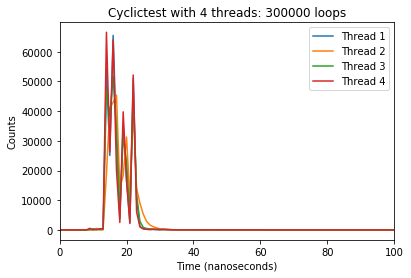

In [30]:
import pandas as pd
df = pd.read_csv('../Fall2020LectureNotes/histogram3cyclictestlab4.txt', sep='\s', skiprows=1, skipfooter=11, engine='python', header=None)
df.drop(columns=[0], inplace=True)
df.head()
p = df.plot(xlim=[0,100], title='Cyclictest with 4 threads: 300000 loops')
p.set_xlabel('Time (nanoseconds)')
p.set_ylabel('Counts')
p.legend(['Thread 1', 'Thread 2', 'Thread 3', 'Thread 4'])


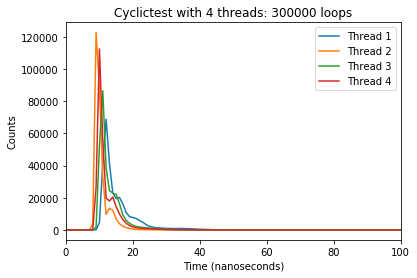

In [35]:
import pandas as pd
df = pd.read_csv('../Fall2020LectureNotes/histogram3cyclictestlab4_coresbusy.txt', sep='\s', skiprows=8, skipfooter=14, engine='python', header=None)
df.drop(columns=[0], inplace=True)
df.head()
p = df.plot(xlim=[0,100], title='Cyclictest with 4 threads: 300000 loops')
p.set_xlabel('Time (nanoseconds)')
p.set_ylabel('Counts')
p.legend(['Thread 1', 'Thread 2', 'Thread 3', 'Thread 4'])

In [17]:
import numpy as np
A = np.random.randn(30) + 1
B = np.random.randn(20)

In [18]:

nA = len(A)
diff = np.mean(A) - np.mean(B)
rand_diffs = []
for i in range(100000):
    xp = np.random.permutation(np.hstack([A,B]))
    rand_diffs.append(np.mean(xp[:nA]) - np.mean(xp[nA:]))

rand_diffs = np.array(rand_diffs)
print("p value (2 sided) is {}".format(len(rand_diffs[abs(rand_diffs) > diff]) / len(rand_diffs)))


p value (2 sided) is 0.00696


In [19]:
2.58* np.sqrt((0.15*0.85)/2000)

0.020599648055245997

In [20]:
974/10072 - 1242/9886

-0.028928474040117697

In [22]:
1.96 * 0.5/np.sqrt(30660)

0.005596802740247507

In [23]:
15348/30660

0.500587084148728

In [25]:
1-0.95**10

0.4012630607616213

In [27]:
1-0.99**10

0.09561792499119559

In [2]:
import numpy as np
np.sqrt(0.05*0.95/25000)

0.0006892024376045111